In [17]:
import sentence_transformers
import numpy
import sklearn.metrics
import matplotlib
import matplotlib.pyplot as plt

In [39]:
# model = sentence_transformers.SentenceTransformer('all-MiniLM-L6-v2')
model = sentence_transformers.SentenceTransformer('multi-qa-mpnet-base-cos-v1')

#Our sentences we like to encode
sentences = [
    'This pizza is cold.',
    'The beer is cold.',
    'The food is pleasant.',
    'The dinner is awful.']

# sentences = [
#     "I am happy.",
#     "I feel pleasant.",
#     "I hate you.",
#     "This is a piece of cheese.",
#     "I dislike you.",
#     "Cheese is made out of milk.",
#     "The car is out of fuel.",
#     "The airplane is on the ground.",
#     "The cellphone is out of battery.",
#     "I drink milk every morning.",
#     "My breakfast has eggs and bacon. "
# ]

# sentences = [
#     "I flew from San Francisco to Los Angeles.",
#     "I did not flew from Los Angeles to San Francisco.", 
#     "I drove from San Francisco to Los Angeles.",
#     "I did not drive from Los Angeles to San Francisco.", 
# ]

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

# Compute the similarity between sentences 
similarity = 1-sklearn.metrics.pairwise_distances(embeddings, metric="cosine")

# numpy.set_printoptions(precision=2)
# print (similarity)


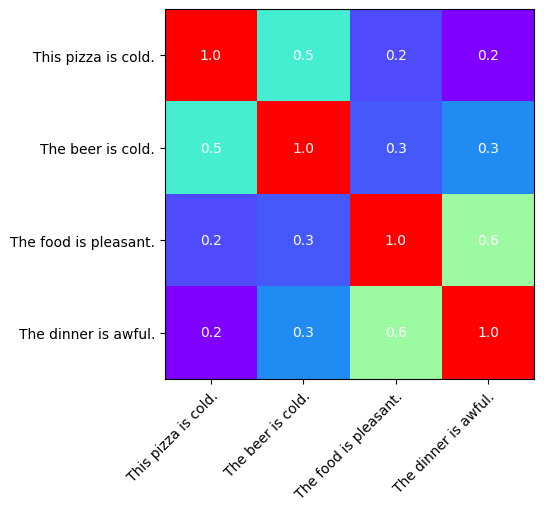

In [40]:

fig, ax = plt.subplots()
im = plt.imshow(similarity, cmap="rainbow")

# Show all ticks and label them with the respective list entries
ax.set_xticks(numpy.arange(len(sentences)), labels=sentences)
ax.set_yticks(numpy.arange(len(sentences)), labels=sentences)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(sentences)):
    for j in range(len(sentences)):
        text = ax.text(j, i, f"{similarity[i, j]:.1f}",
                       ha="center", va="center", color="w")